In [1]:
pip install numpy scipy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


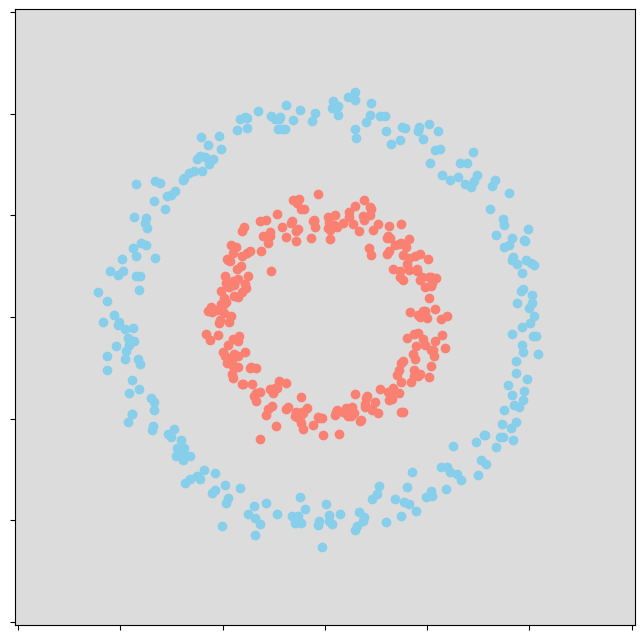

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordenadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacío a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)



C:\Users\jaime\AppData\Local\Temp\ipykernel_10868\999735988.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Step 0 / 1000 - Loss =  0.4985461 - Acc = 0.5
Step 25 / 1000 - Loss =  0.49851453 - Acc = 0.5
Step 50 / 1000 - Loss =  0.49848172 - Acc = 0.5
Step 75 / 1000 - Loss =  0.49844763 - Acc = 0.5
Step 100 / 1000 - Loss =  0.49841207 - Acc = 0.5
Step 125 / 1000 - Loss =  0.498375 - Acc = 0.5
Step 150 / 1000 - Loss =  0.49833626 - Acc = 0.5
Step 175 / 1000 - Loss =  0.4982957 - Acc = 0.5
Step 200 / 1000 - Loss =  0.49825323 - Acc = 0.5
Step 225 / 1000 - Loss =  0.49820876 - Acc = 0.5
Step 250 / 1000 - Loss =  0.4981621 - Acc = 0.5
Step 275 / 1000 - Loss =  0.49811307 - Acc = 0.5
Step 300 / 1000 - Loss =  0.49806157 - Acc = 0.5
Step 325 / 1000 - Loss =  0.49800736 - Acc = 0.5
Step 350 / 1000 - Loss =  0.49795014 - Acc = 0.5
Step 375 / 1000 - Loss =  0.49788988 - Acc = 0.5
Step 400 / 1000 - Loss =  0.49782655 - Acc = 0.5
Step 425 / 1000 - Loss =  0.49775967 - Acc = 0.5
Step 450 / 1000 - Loss =  0.49768904 - Acc = 0.5
Step 475 / 1000 - Loss =  0.49761444 - Acc = 0.5
Step 500 / 1000 - Loss =  0.49

RuntimeError: Requested MovieWriter (ffmpeg) not available

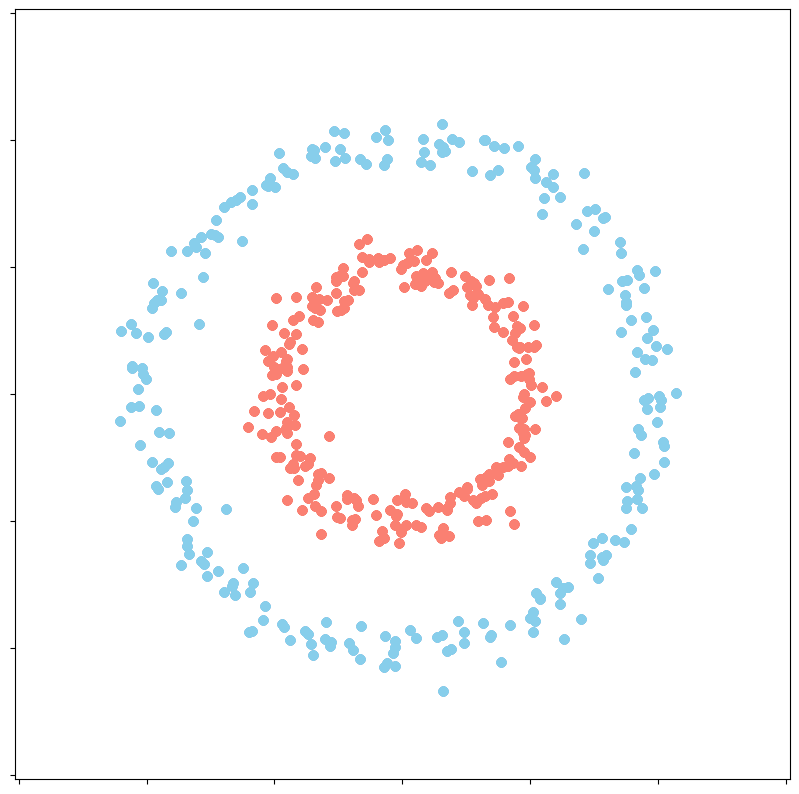

In [13]:
# Importar TensorFlow 1.x en modo compatibilidad
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.core.display import display, HTML
from sklearn.datasets import make_circles

# Crear datos artificiales: dos anillos concéntricos de datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Definir placeholders de entrada
ix = tf.placeholder("float", shape=[None, X.shape[1]])  # Datos de entrada (características)
iy = tf.placeholder("float", shape=[None])  # Etiquetas de destino

# Hiperparámetros
lr = 0.01  # Tasa de aprendizaje
nn = [2, 16, 8, 1]  # Número de neuronas por capa (incluyendo entrada y salida)

# Construir las capas de la red neuronal
# Capa 1
W1 = tf.Variable(tf.random.normal([nn[0], nn[1]]), name="Weights_1")
b1 = tf.Variable(tf.random.normal([nn[1]]), name="bias_1")
l1 = tf.nn.relu(tf.add(tf.matmul(ix, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random.normal([nn[1], nn[2]]), name="Weights_2")
b2 = tf.Variable(tf.random.normal([nn[2]]), name="bias_2")
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3 (capa de salida)
W3 = tf.Variable(tf.random.normal([nn[2], nn[3]]), name="Weights_3")
b3 = tf.Variable(tf.random.normal([nn[3]]), name="bias_3")
py = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]  # Salida de probabilidad

# Definir la función de pérdida (error cuadrático medio para clasificación binaria)
loss = tf.losses.mean_squared_error(py, iy)

# Definir el optimizador (descenso por gradiente)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

# Parámetros de entrenamiento
n_steps = 1000  # Número de pasos de entrenamiento

# Lista para almacenar predicciones para la animación
ipy = []

# Sesión de TensorFlow
with tf.Session() as sess:
    # Inicializar parámetros de la red
    sess.run(tf.global_variables_initializer())

    # Bucle de entrenamiento
    for step in range(n_steps):
        # Entrenar la red
        _, _loss, _py = sess.run([optimizer, loss, py], feed_dict={ix: X, iy: Y})

        # Imprimir métricas cada 25 pasos
        if step % 25 == 0:
            # Calcular precisión (asumiendo que las predicciones redondeadas coinciden con las etiquetas)
            acc = np.mean(np.round(_py) == Y)
            print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

            # Obtener predicción para visualización (reformar para el gráfico 2D)
            _pY = sess.run(py, feed_dict={ix: _pX}).reshape((res, res))
            ipy.append(_pY)

# ----------- CÓDIGO ANIMACIÓN -----------
ims = []
fig = plt.figure(figsize=(10, 10))
print("---  generando animación  ---")

for fr in range(len(ipy)):
    # Visualización del mapa de predicción.
    im = plt.pcolormesh(_x0, _x1, ipy[fr], cmap="coolwarm", animated=True)
    # Visualización de la nube de datos.
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
    plt.tick_params(labelbottom=False, labelleft=False)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())


In [18]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML



lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos las capas
model.add(kr.layers.Dense(nn[1], activation='relu'))  # Capa 1
model.add(kr.layers.Dense(nn[2], activation='relu'))  # Capa 2
model.add(kr.layers.Dense(nn[3], activation='sigmoid'))  # Capa 3

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

# Entrenamos el modelo
model.fit(X, Y, epochs=100)






Epoch 1/100


C:\Users\jaime\AppData\Local\Temp\ipykernel_10868\1189620176.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [15]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML

# Definimos la tasa de aprendizaje (learning rate)
Ir = 0.01

# Definimos la arquitectura de la red neuronal
nn = [2, 16, 8, 1]

# Creamos el objeto del modelo de red neuronal multicapa
clf = sk.neural_network.MLPRegressor(
    solver='sgd',
    learning_rate_init=Ir,
    hidden_layer_sizes=tuple(nn[1:]),
    verbose=True,
    n_iter_no_change=1000,
    batch_size=64
)

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X, Y)


C:\Users\jaime\AppData\Local\Temp\ipykernel_10868\3161936428.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Iteration 1, loss = 0.37074934
Iteration 2, loss = 0.12387613
Iteration 3, loss = 0.12989310
Iteration 4, loss = 0.12990834
Iteration 5, loss = 0.12641537
Iteration 6, loss = 0.12550307
Iteration 7, loss = 0.12535023
Iteration 8, loss = 0.12515506
Iteration 9, loss = 0.12509142
Iteration 10, loss = 0.12505558
Iteration 11, loss = 0.12514078
Iteration 12, loss = 0.12512898
Iteration 13, loss = 0.12506551
Iteration 14, loss = 0.12502243
Iteration 15, loss = 0.12510529
Iteration 16, loss = 0.12512126
Iteration 17, loss = 0.12508486
Iteration 18, loss = 0.12525085
Iteration 19, loss = 0.12507448
Iteration 20, loss = 0.12505708
Iteration 21, loss = 0.12508387
Iteration 22, loss = 0.12502869
Iteration 23, loss = 0.12505606
Iteration 24, loss = 0.12504795
Iteration 25, loss = 0.12508432
Iteration 26, loss = 0.12509126
Iteration 27, loss = 0.12507681
Iteration 28, loss = 0.12506139
Iteration 29, loss = 0.12505379
Iteration 30, loss = 0.12506499
Iteration 31, loss = 0.12507457
Iteration 32, los

c:\Users\jaime\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)